# Linear Regression practical example

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading Data

In [2]:
raw_data = pd.read_csv("1.04.+Real-life+example.csv")
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

### Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include='all') # without include='all', only the stats for numerical data will be shown

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

### Determining the variables of interest

In [5]:
data = raw_data.drop(['Model'], axis=1) #axis 1 is for column and axis 0 is for row
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Dealing with missing values

In [6]:
data.isnull()

Brand  Price   Body  Mileage  EngineV  Engine Type  Registration   Year
0     False  False  False    False    False        False         False  False
1     False  False  False    False    False        False         False  False
2     False  False  False    False    False        False         False  False
3     False  False  False    False    False        False         False  False
4     False  False  False    False    False        False         False  False
...     ...    ...    ...      ...      ...          ...           ...    ...
4340  False  False  False    False    False        False         False  False
4341  False  False  False    False    False        False         False  False
4342  False  False  False    False    False        False         False  False
4343  False  False  False    False     True        False         False  False
4344  False  False  False    False    False        False         False  False

[4345 rows x 8 columns]

In [7]:
data.isnull().sum() #will sum all the missing values and give us the number of null observations

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

NB: if you are removing <5% of the observations. you are free to just remove all that hvae missing values 

In [8]:
data_no_mv = data.dropna(axis=0) #dropna is used to drop observations with missing values
data_no_mv.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Exploring the PDFs

C:\Users\tangu\AppData\Local\Temp\ipykernel_2528\2156581670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price']) #the probability distribution function of price


<Axes: xlabel='Price', ylabel='Density'>

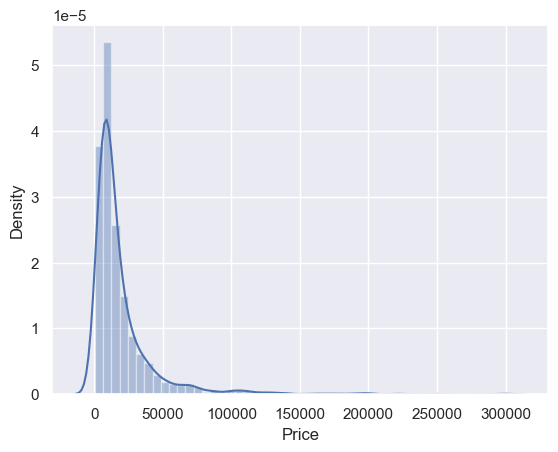

In [9]:
sns.distplot(data_no_mv['Price']) #the probability distribution function of price

Ideally we are looking for a normal distribution, from the chart and discribtive stats we can see that price has some outliers.
one way to deal with outliers seemlessly is to remove top 1% of observations. One way to do this is using the Quantile method. DataFrame.quantile(the quantile) returns the value the given quantile (=np.percenttile); it takes values from 0 to 1. if you enter 0.25, it will take the 25th percentile.
We want to get the 99th percentile and keep the data below it

### Dealing with outliers

In [10]:
q = data_no_mv['Price'].quantile(0.99) # this returns a single value
data_1 = data_no_mv[data_no_mv['Price']<q] # returns all data with price less than the 99th percentile
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

C:\Users\tangu\AppData\Local\Temp\ipykernel_2528\2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

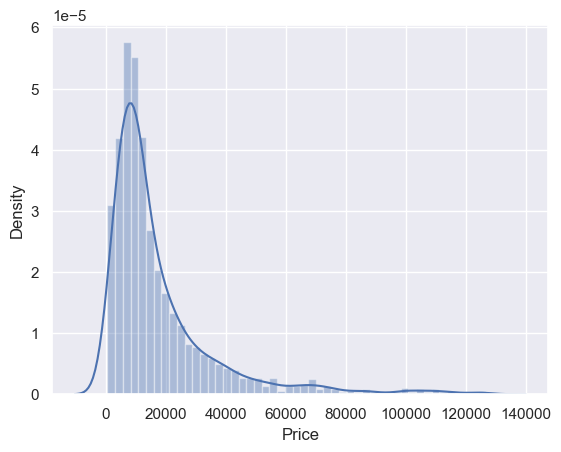

In [15]:
sns.distplot(data_1['Price'])

C:\Users\tangu\AppData\Local\Temp\ipykernel_2528\1547815769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

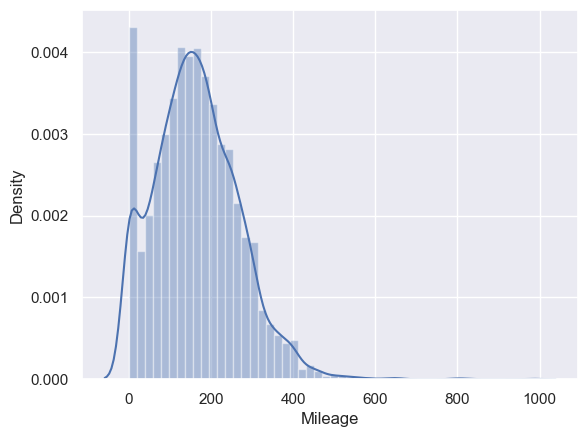

In [13]:
sns.distplot(data_1['Mileage'])

In [17]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\tangu\AppData\Local\Temp\ipykernel_2528\1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

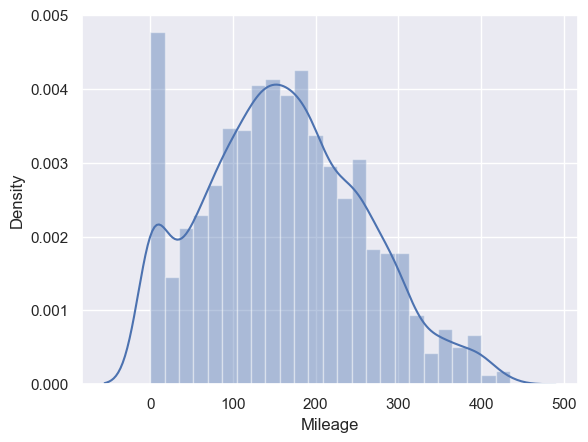

In [18]:
sns.distplot(data_2['Mileage'])

C:\Users\tangu\AppData\Local\Temp\ipykernel_2528\2389813043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

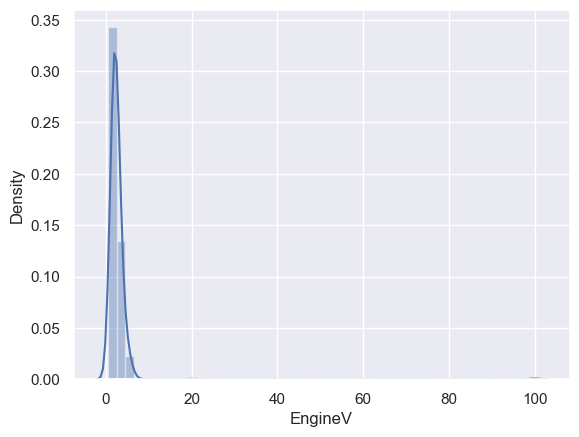

In [21]:
sns.distplot(data_2['EngineV'])

In [23]:
data_3 = data_2[data_2['EngineV']<6.5] # from research online 6.5 is the max engine value

C:\Users\tangu\AppData\Local\Temp\ipykernel_2528\1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

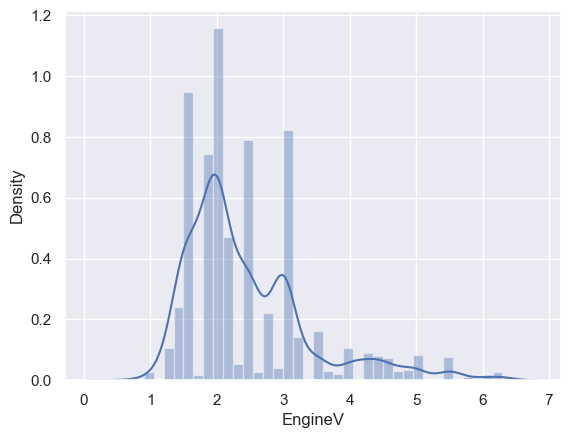

In [24]:
sns.distplot(data_3['EngineV'])

C:\Users\tangu\AppData\Local\Temp\ipykernel_2528\2525852583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Year'])


<Axes: xlabel='Year', ylabel='Density'>

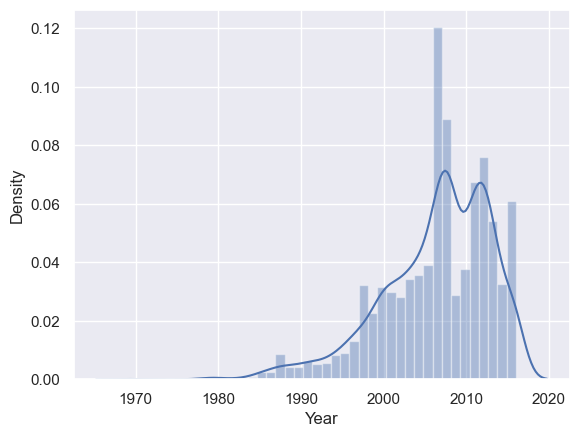

In [25]:
sns.distplot(data_3['Year'])

As we can see from the image above, we have more of outliers to the left, so we want to keep values greater than the 1th percentile

In [27]:
q=data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\tangu\AppData\Local\Temp\ipykernel_2528\2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

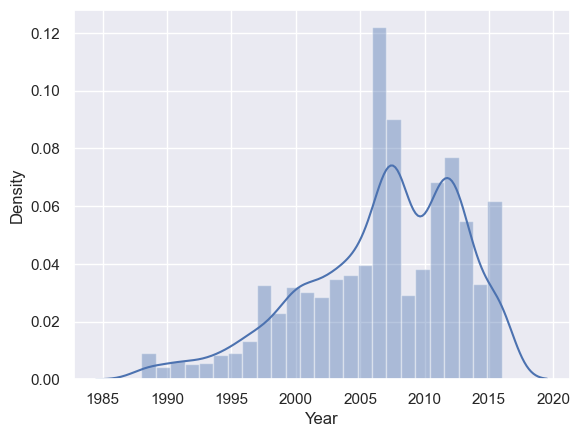

In [29]:
sns.distplot(data_4['Year'])

In [31]:
data_cleaned = data_4
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4338     Volkswagen   11500.0        van      163      2.5      Diesel   
4339         Toyota   17900.0      sedan       35      1.6      Petrol   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
4338          yes  2008  
4339          yes  2014  
4340          yes  2014  
4341          yes  1999  
4344          yes  2013  

[3867 rows x 8 columns]

In [32]:
#from the data printed above, we can see that the index is not orderly, so we have to reset the index using reset_index method
data_cleaned = data_4.reset_index(drop=True) # drop=True makes it to totally forget about the old index

In [33]:
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

## Checking the OLS assumptons

In [34]:
# when checking assumptioins we don't have to worry abt the categorical values
# we will be focused on price, year, enginev and mileage


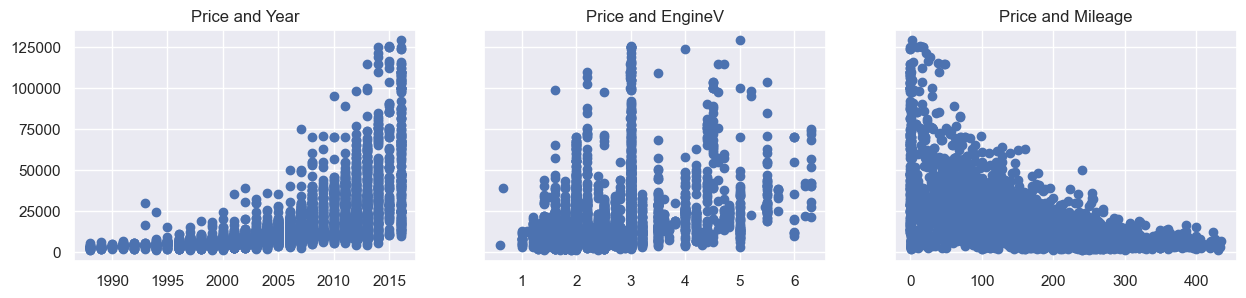

In [35]:
f, (ax1, ax2, ax3)=plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

#### As we can see, none of the relationship is linear, so we need to perform transformation, one posible transformation is the Log transformation which are especially useful when facing exponential relationships.
We will transform price

### Relaxing the assumptions

In [37]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3862     Volkswagen   11500.0        van      163      2.5      Diesel   
3863         Toyota   17900.0      sedan       35      1.6      Petrol   
3864  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3865            BMW    6500.0      sedan        1      3.5      Petrol   
3866     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  log_price  
0             yes  1991   8.342840  
1             yes  1999   8.974618  
2             yes  2003   9.495519  
3             yes  2007  10.043249  
4             yes  2011   9.814656  
...           ...   ...        ...  
3862          yes  2008   9.350102  
3863          yes  2014   9.792556  
3864          yes  2014  11.736069  
3865          yes  1999   8.779557  
3866          yes  2013   9.510445  

[3867 rows x 9 columns]

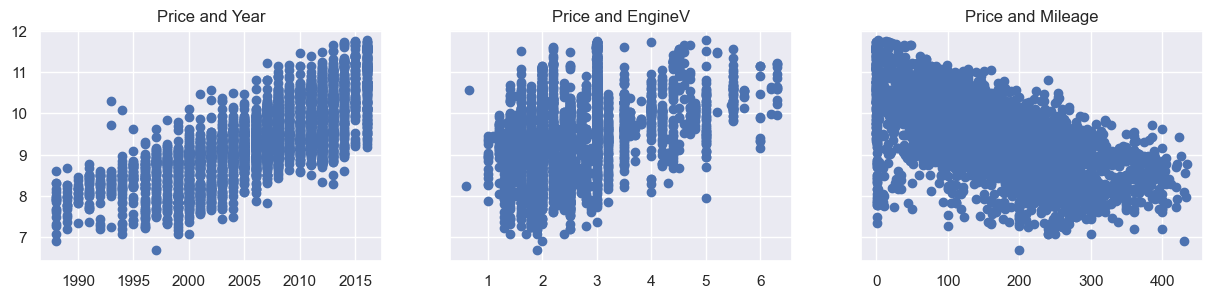

In [38]:
f, (ax1, ax2, ax3)=plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

In [39]:
# we drop the original price variable since its no longer needed
data_cleaned = data_cleaned.drop(['Price'], axis=1)
1. the above takes care of Linearity.
2. No endogeneity of regressors is assumed to hold, we will see more after our regression
3. Normaility and homoscedesticity holds since we've already performed log transfromation
4. Since there isn'time series data, we assume that no autocorrelation holds
5. it is logical that 'Year' and 'Mileage' will be correlated

### Multicollinearity

In [40]:
# sklearn does not have a dedicated method to check this assumption, so we will use statsmodels
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [42]:
# one of the ways to check for multicollinearity is through VIF (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [43]:
vif

VIF features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

VIF E [1, +inf)
if VIF=1:no multicolinearity
if 1<VIF<5: perfectly okay
if VIF>10: unacceptable, there's no standard cuttoff for this set, some use 5, 6 etc

In [44]:
# From our case it seems year is too correlated with the other variables, so we will remove year
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Creating dummy variables

pd.get_dummies(df[,drop_first]) spots all categorical variables and creates dummies automatically. 
Note: if we have N categories for a feature, we have to create N-1 dummies.
if we create a separate dummy variable for each category, we will introduce multicollinearity to the regression


In [45]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True) 
#drop_first here makes sure we don't create a dummy for the first categorical variable

In [46]:
data_with_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

## Rearrange abit

In [47]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [49]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [50]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

## Linear Regression model

### Declare the inputs and the targets

In [51]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scale the data

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [53]:
inputs_scaled = scaler.transform(inputs)

We've standardized all the input variables
NB: note that it is not usually recommended to standardize dummy variables,
For ML purposes, scaling has no effect on the predictive power of dummies, once scaled, though, they lose their dummy meaning

### Train Test split

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [56]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

The above was enough to create our linear regression model, infact the log-linear regression as the dependent variable is the log of price. A simple way to check the final results is to plot the predicted values against the observed values, and observe if it fits a 45 degree line

In [57]:
y_hat = reg.predict(x_train)

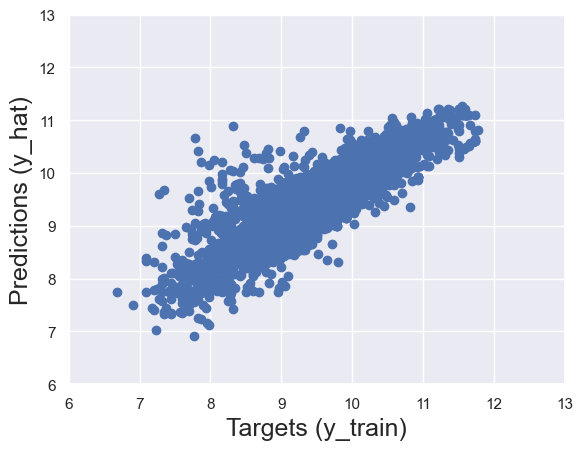

In [59]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Another popular check is the residual plot. Residual = Difference btw the targets and the predictions. A residual plot refers to the distribution of the residuals

C:\Users\tangu\AppData\Local\Temp\ipykernel_2528\3979712437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

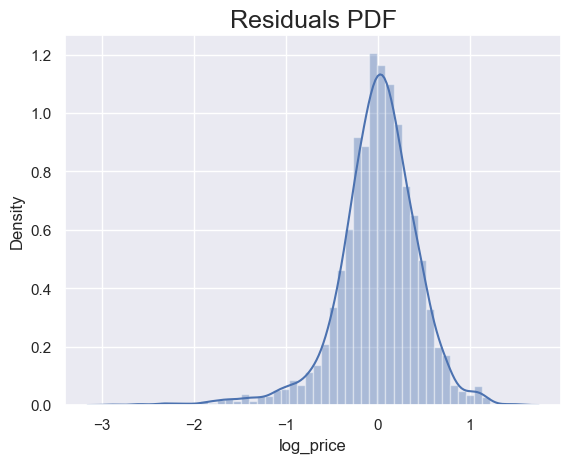

In [61]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [62]:
reg.score(x_train, y_train)

0.744996578792662

### finding the weights and bias

In [64]:
reg.intercept_

9.415239458021299

In [65]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [66]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features   Weights
0               Mileage -0.448713
1               EngineV  0.209035
2             Brand_BMW  0.014250
3   Brand_Mercedes-Benz  0.012882
4      Brand_Mitsubishi -0.140552
5         Brand_Renault -0.179909
6          Brand_Toyota -0.060550
7      Brand_Volkswagen -0.089924
8            Body_hatch -0.145469
9            Body_other -0.101444
10           Body_sedan -0.200630
11           Body_vagon -0.129887
12             Body_van -0.168597
13      Engine Type_Gas -0.121490
14    Engine Type_Other -0.033368
15   Engine Type_Petrol -0.146909
16     Registration_yes  0.320473

# Weights interpretation
## 1. Continuous variables
1. A positive weight shows that as a feature increases in value, so do the log_price and the 'Price' respectively
2. A negative weight shows that as a feature increases in value, log_price and 'Price' decrease

## 2. Dummy variables
1. A positive weight shows that the respective category (brand) is more expensive then the benchmark(Audi), audi was the one we left out
2. A negative weight shows that the respective category (Brand) is less expensive than the benchmark (audi)

NB: the bigger the weight the more the impact, so Mileage is the most prominent feature in this regression

In [67]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# Testing

In [68]:
y_hat_test = reg.predict(x_test)

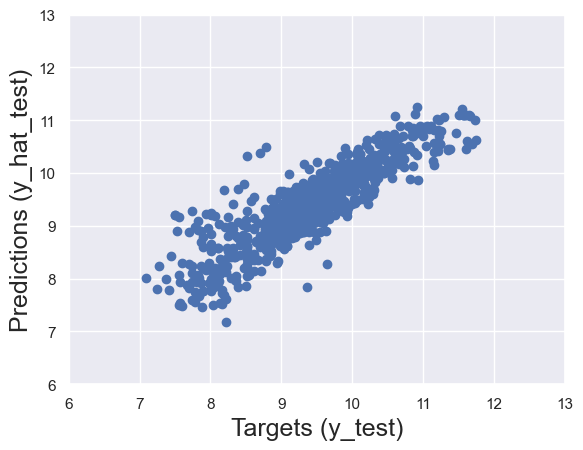

In [69]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
# NB: the test is to see if a 45deg line can fit the data

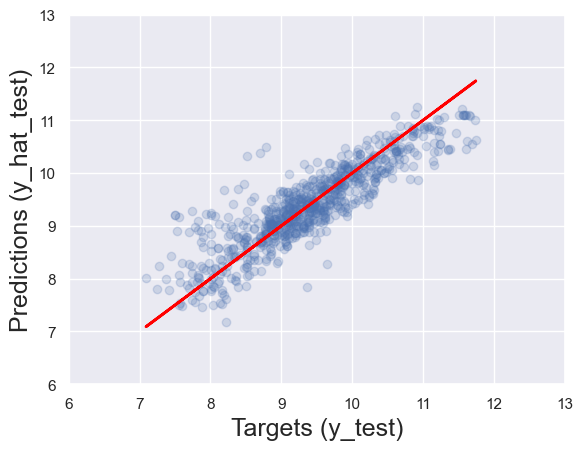

In [74]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
fig = plt.plot(y_test, y_test, lw=2, c='red', label='regression line') #45 deg line
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
# NB: the test is to see if a 45deg line can fit the data

In [75]:
df_pf = pd.DataFrame(y_hat_test, columns=['Predictions'])
df_pf

Predictions
0       9.276643
1       8.160305
2       8.929738
3       8.917842
4       9.337280
..           ...
769    10.297276
770     9.280992
771     9.541258
772    10.221496
773     9.509790

[774 rows x 1 columns]

exp(ln(x))=|x|

log(exp(x)) = x
, if we take the exponentials of the log prices we will reach the original prices. and the easiest way to achieve that is through the np.exp(x) method

In [76]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf

Predictions
0    10685.501696
1     3499.255242
2     7553.285218
3     7463.963017
4    11353.490075
..            ...
769  29651.726363
770  10732.071179
771  13922.446953
772  27487.751303
773  13491.163043

[774 rows x 1 columns]

In [77]:
df_pf['Target']=np.exp(y_test)
df_pf

Predictions  Target
0    10685.501696     NaN
1     3499.255242  7900.0
2     7553.285218     NaN
3     7463.963017     NaN
4    11353.490075     NaN
..            ...     ...
769  29651.726363  6950.0
770  10732.071179     NaN
771  13922.446953     NaN
772  27487.751303     NaN
773  13491.163043     NaN

[774 rows x 2 columns]

In [78]:
# The missing values is as a result of unmatched indexes, we resolve it by resetting the indexes of y_test
y_test = y_test.reset_index(drop=True)
y_test.head()


0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [79]:
df_pf['Target']=np.exp(y_test)
df_pf

Predictions   Target
0    10685.501696   2300.0
1     3499.255242   2800.0
2     7553.285218   2500.0
3     7463.963017   6400.0
4    11353.490075   9150.0
..            ...      ...
769  29651.726363  29500.0
770  10732.071179   9600.0
771  13922.446953  18300.0
772  27487.751303  68500.0
773  13491.163043  10800.0

[774 rows x 2 columns]

In [80]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [81]:
df_pf['Difference %'] = np.absolute(df_pf['Residual']/df_pf['Target'])*100
df_pf

Predictions   Target      Residual  Difference %
0    10685.501696   2300.0  -8385.501696    364.587030
1     3499.255242   2800.0   -699.255242     24.973402
2     7553.285218   2500.0  -5053.285218    202.131409
3     7463.963017   6400.0  -1063.963017     16.624422
4    11353.490075   9150.0  -2203.490075     24.081859
..            ...      ...           ...           ...
769  29651.726363  29500.0   -151.726363      0.514327
770  10732.071179   9600.0  -1132.071179     11.792408
771  13922.446953  18300.0   4377.553047     23.921055
772  27487.751303  68500.0  41012.248697     59.871896
773  13491.163043  10800.0  -2691.163043     24.918176

[774 rows x 4 columns]

In [82]:
df_pf.describe()

Predictions         Target      Residual  Difference %
count    774.000000     774.000000    774.000000    774.000000
mean   15946.760167   18165.817106   2219.056939     36.256693
std    13133.197604   19967.858908  10871.218143     55.066507
min     1320.562768    1200.000000 -29456.498331      0.062794
25%     7413.644234    6900.000000  -2044.191251     12.108022
50%    11568.168859   11600.000000    142.518577     23.467728
75%    20162.408805   20500.000000   3147.343497     39.563570
max    77403.055224  126000.000000  85106.162329    512.688080

In [83]:
df_pf.sort_values(by=['Difference %'])

Predictions   Target      Residual  Difference %
698  30480.847838  30500.0     19.152162      0.062794
742  16960.310476  16999.0     38.689524      0.227599
60   12469.207487  12500.0     30.792513      0.246340
110  25614.137960  25500.0   -114.137960      0.447600
367  42703.676996  42500.0   -203.676996      0.479240
..            ...      ...           ...           ...
657  32481.045510   6000.0 -26481.045510    441.350758
162   9954.416247   1800.0  -8154.416247    453.023125
451  35956.498331   6500.0 -29456.498331    453.176897
532  10019.903027   1800.0  -8219.903027    456.661279
639  30628.277108   4999.0 -25629.277108    512.688080

[774 rows x 4 columns]

In [84]:
pd.options.display.max_rows = 900
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference %'])

Predictions    Target  Residual  Difference %
698     30480.85  30500.00     19.15          0.06
742     16960.31  16999.00     38.69          0.23
60      12469.21  12500.00     30.79          0.25
110     25614.14  25500.00   -114.14          0.45
367     42703.68  42500.00   -203.68          0.48
369      3084.69   3100.00     15.31          0.49
769     29651.73  29500.00   -151.73          0.51
272      9749.53   9800.00     50.47          0.52
714     23118.07  22999.00   -119.07          0.52
630      8734.58   8800.00     65.42          0.74
380      3473.79   3500.00     26.21          0.75
648     21174.10  21335.00    160.90          0.75
308      8967.74   8900.00    -67.74          0.76
665     17858.02  18000.00    141.98          0.79
379     17654.84  17800.00    145.16          0.82
719     11391.95  11500.00    108.05          0.94
102     28625.56  28900.00    274.44          0.95
94       7724.17   7800.00     75.83          0.97
561      6429.03   6500.00     70.97          1.09
242      7597.39   7500.00    -97.39          1.30
528     18555.09  18800.00    244.91          1.30
61       7396.87   7300.00    -96.87          1.33
19      16178.14  16400.00    221.86          1.35
280     12327.10  12499.00    171.90          1.38
311     51287.19  52055.25    768.06          1.48
723      6009.63   6100.00     90.37          1.48
49       4973.17   4900.00    -73.17          1.49
114     27716.14  27300.00   -416.14          1.52
636     28498.91  28950.00    451.09          1.56
612      2953.17   3000.00     46.83          1.56
47      26425.14  25999.00   -426.14          1.64
23      13111.91  12900.00   -211.91          1.64
31      12858.08  12650.00   -208.08          1.64
91      13421.16  13200.00   -221.16          1.68
329      7327.18   7200.00   -127.18          1.77
549      3816.33   3750.00    -66.33          1.77
252      9721.50   9900.00    178.50          1.80
387     44173.72  44999.00    825.28          1.83
267     40753.58  40000.00   -753.58          1.88
467     22262.80  22711.65    448.85          1.98
556     18231.44  18600.00    368.56          1.98
165      9596.94   9400.00   -196.94          2.10
259      6067.79   6200.00    132.21          2.13
601     35371.16  34600.00   -771.16          2.23
708     11967.39  11700.00   -267.39          2.29
593     17908.00  17500.00   -408.00          2.33
398      8707.13   8500.00   -207.13          2.44
526     29049.27  28350.00   -699.27          2.47
603     14513.46  14900.00    386.54          2.59
53      20453.89  21000.00    546.11          2.60
632     15383.35  14990.00   -393.35          2.62
533     24642.50  24000.00   -642.50          2.68
497     50099.92  51500.00   1400.08          2.72
212     16133.86  15700.00   -433.86          2.76
130     17489.92  18000.00    510.08          2.83
290      1894.40   1950.00     55.60          2.85
78      30810.25  29900.00   -910.25          3.04
642      8721.97   8999.00    277.03          3.08
437     18866.50  18300.00   -566.50          3.10
101      5958.63   6150.00    191.37          3.11
314      5811.74   6000.00    188.26          3.14
150      9800.43   9500.00   -300.43          3.16
565      7324.63   7100.00   -224.63          3.16
574     12583.52  13000.00    416.48          3.20
591     10115.13   9800.00   -315.13          3.22
172     11156.38  10800.00   -356.38          3.30
133      9279.28   9600.00    320.72          3.34
480     31369.37  32500.00   1130.63          3.48
87       2315.71   2400.00     84.29          3.51
11       5175.77   5000.00   -175.77          3.52
43      21611.83  22400.00    788.17          3.52
96       7976.26   7700.00   -276.26          3.59
406     24874.86  23999.00   -875.86          3.65
173     36516.35  37900.00   1383.65          3.65
540      4666.05   4500.00   -166.05          3.69
40      18672.68  18000.00   -672.68          3.74
340     14815.83  15400.00    584.17          3.79
239     10581.62  10999.00 

### How to impove our model
1. use a different se tof variables
2. Remove a bigger part of th outliers
3. Use different kinds of transformations